## PLANETS_EDA -Module 06 EDA - 2/17/2025


- Author: [Nathan Sloss](https://github.com/nwn8)
- Repository: [datafun-06-eda](https://github.com/nwn8/datafun-06-eda)

The Planets dataset includes information about exoplanets, such as their orbital periods and masses. It includes features such as method of detecting the exoplanet, number of planets in the system, orbital period, mass of the planet, and distance from Earth.

Advantages: Unique dataset in the field of astronomy, suitable for exploring exoplanet characteristics and trends.
Disadvantages: Limited to exoplanetary data, small dataset compared to other astronomical datasets.

Features and Characteristics
<ol>
<li>method: Method of detecting the exoplanet (categorical)</li>
<li>number: Number of planets in the system (numerical)</li>
<li>orbital_period: Orbital period in Earth days (numerical)</li>
<li>mass: Mass of the planet in Jupiter masses (numerical)</li>
<li>distance: Distance from Earth in light-years (numerical)</li>
</ol>
An exoplanet is a planet that orbits a star outside of our solar system. 

Assume that each row is a new exoplanet observation showing the method of observation, the number of plates observed in the system, the mass of the planet observed, the distance from the earth in light years, and the year the observation was made. 

## 1. Import Dependencies

In [101]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Axes object (basic plot type returned by Seaborn)
from matplotlib.axes import Axes

## 2. Load Data

In [102]:
# Load the Iris dataset into pandas DataFrame
planets_df: pd.DataFrame = sns.load_dataset('planets')

# List column names
planets_df.columns

# Inspect first few rows of the DataFrame
planets_df.head(80)


,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.30000,7.100,77.40,2006
1,Radial Velocity,1,874.77400,2.210,56.95,2008
2,Radial Velocity,1,763.00000,2.600,19.84,2011
3,Radial Velocity,1,326.03000,19.400,110.62,2007
4,Radial Velocity,1,516.22000,10.500,119.47,2009
...,...,...,...,...,...,...
75,Imaging,1,8679.70000,NaN,26.67,2009
76,Radial Velocity,1,655.60000,5.100,37.54,2008
77,Radial Velocity,1,714.30000,10.600,NaN,2007
78,Radial Velocity,1,3.48777,NaN,80.00,2000


## 3. Data Inspection

In [103]:
planets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


## 4. Initial Descriptive Analytics

In [104]:
planets_df.describe()

,number,orbital_period,mass,distance,year
count,1035.000000,992.000000,513.000000,808.000000,1035.000000
mean,1.785507,2002.917596,2.638161,264.069282,2009.070531
std,1.240976,26014.728304,3.818617,733.116493,3.972567
min,1.000000,0.090706,0.003600,1.350000,1989.000000
25%,1.000000,5.442540,0.229000,32.560000,2007.000000
50%,1.000000,39.979500,1.260000,55.250000,2010.000000
75%,2.000000,526.005000,3.040000,178.500000,2012.000000
max,7.000000,730000.000000,25.000000,8500.000000,2014.000000


The average orbital period is 2002 Earth days around the planets star.  The average distance is 264 light years away.   The largest plate observed is 25 times the mass of Jupiter while the smallest is .003 the size of Jupiter. The majority of observations had 2 or less planets while there was at least one observation with 7 planets.  We are not terribly concerned about the year of the observation. 

## 5. Initial Data Distribution for Numerical Columns

Text(0.5, 0, 'Count of Observatons')

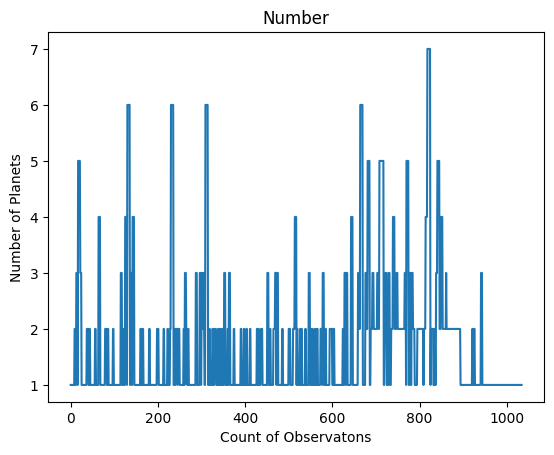

In [105]:
plt.plot(planets_df['number'])
plt.title('Number')
plt.ylabel('Number of Planets')
plt.xlabel('Count of Observatons')


The great majority had 1-2 planets while some had as many as 6 planets and one had 7 planets

Text(0, 0.5, 'Count of Observatons')

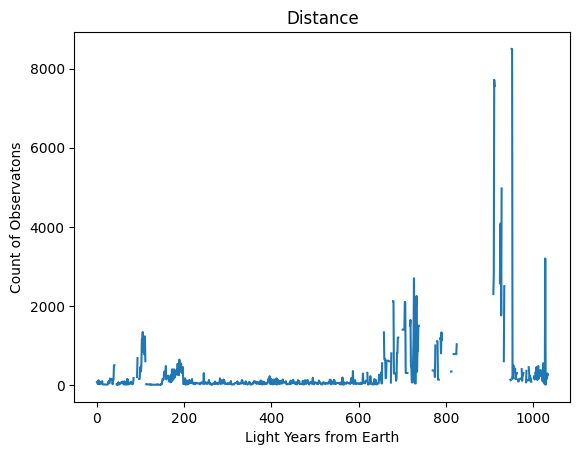

In [106]:
plt.plot(planets_df['distance'])
plt.title('Distance')
plt.xlabel('Light Years from Earth')
plt.ylabel('Count of Observatons')

The majority of planets fall less than 1000 light years away while some of them are 8000 light years.

Text(0, 0.5, 'Count of Observatons')

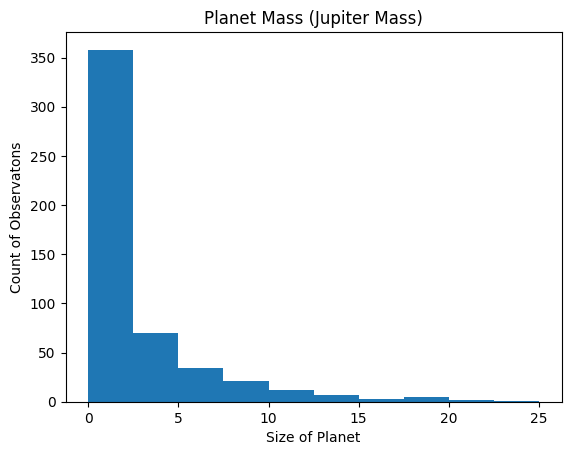

In [107]:
plt.hist(planets_df['mass'])
plt.title('Planet Mass (Jupiter Mass)')
plt.xlabel('Size of Planet')
plt.ylabel('Count of Observatons')


The majority of planets were small.  

Text(0.5, 0, 'Count of Observatons')

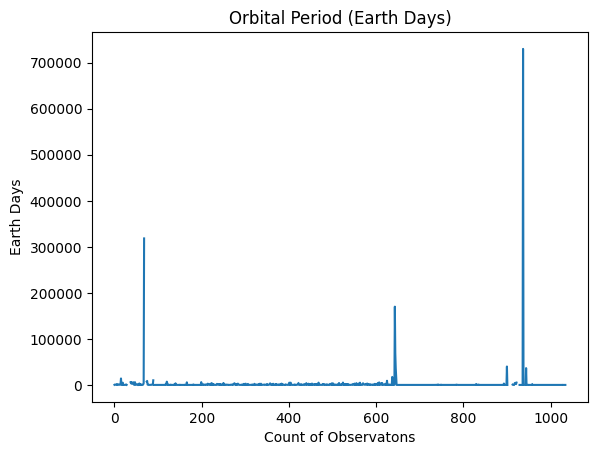

In [108]:
plt.plot(planets_df['orbital_period'])
plt.title('Orbital Period (Earth Days)')
plt.ylabel('Earth Days')
plt.xlabel('Count of Observatons')

The vast majority of planets have orbital periods of less than 1000 days.

## 5. Initial Data Distribution for Categorical Columns

In [109]:
planets_df['method'].value_counts()

method
Radial Velocity                  553
Transit                          397
Imaging                           38
Microlensing                      23
Eclipse Timing Variations          9
Pulsar Timing                      5
Transit Timing Variations          4
Orbital Brightness Modulation      3
Astrometry                         2
Pulsation Timing Variations        1
Name: count, dtype: int64

The majority of observations were made by Radial Velocity and Transit.

The radial velocity method is also known as Doppler Spectroscopy. The formula for radial velocity includes the speed of light, c, and the observed Doppler shift.
The transit method for finding exoplanets involves detecting a planet by observing the slight dimming of a star's light when the planet passes directly in front of it

## 6. Observational Characteristics.

Questions we may answer with the data provided may include.  Is there any correlation between the size of a planet and its orbital period? Do larger planets have smaller or larger orbital patterns.  Are there any correlations betwen distance from earth and size of planet?  Do planets tend to get larger or smaller the farther away from Earth.  Finally is there a correlation between the orbital period and the distance from Earth?  Do planets further away have large or small orbiatal patterns.  For this we will create a new dataframe with only these columns.

In [110]:
new_df = planets_df[['orbital_period', 'mass', 'distance']].copy()

new_df.head(10)

,orbital_period,mass,distance
0,269.300,7.10,77.40
1,874.774,2.21,56.95
2,763.000,2.60,19.84
3,326.030,19.40,110.62
4,516.220,10.50,119.47
5,185.840,4.80,76.39
6,1773.400,4.64,18.15
7,798.500,NaN,21.41
8,993.300,10.30,73.10
9,452.800,1.99,74.79


## 7. Initial Visualizations

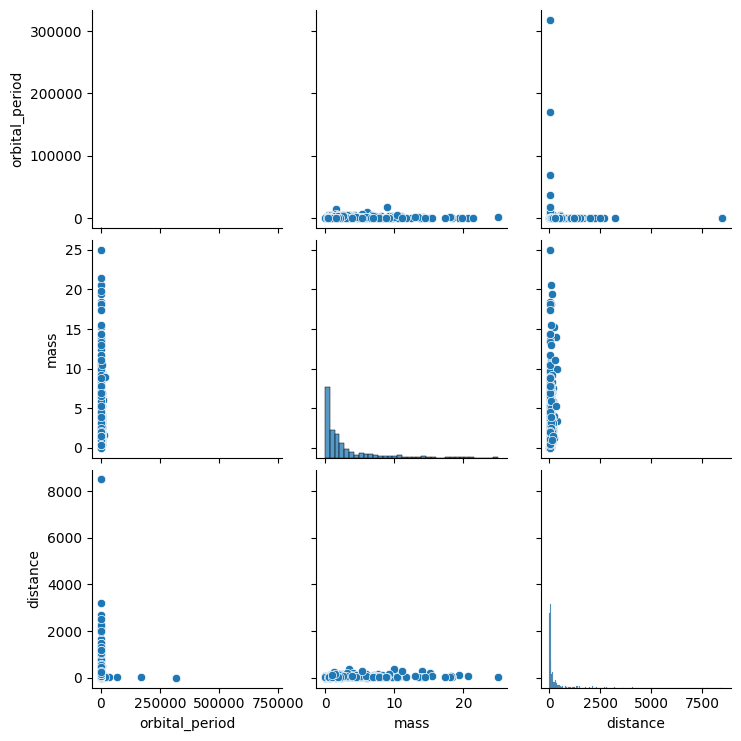

In [111]:
sns.pairplot(new_df)
plt.show()

## 8. Initial Insights

The first row of graphs shows that the size of the planet has relatively low impact on the orbital period.  While some of the nearer planets have a longer orbital period.  

The second row of the graphs shows that the size of the planets do not have any particular correlation to the distance.  

Finally the third row confirms the larger orbital periods are from closer planets.  

## Annotation

This notebook uses the "Planets" dataset provided by Seaborn.  The purpose of this notebook is for the practice of exploratory data analysis.  

The data includes one table of over 1000 observations of Exoplanets.  Exoplanet data were collected using various modern scientific techniques the majority of which were Radial Velocity observing and Transit recording.  

The most interesting insights come from the initial exploring of the dataset without regard to the observational method or year the data was gathered.  

This will show that there are some exo planet observations that are "solar systems" that have 6 or more planets traveling around a single star.  
Other planets are 25 times the size of Jupiter (our largest planet in our solar system).

Some planets have a very long orbital path around their star the longest being 730000 Earth days or approximately one orbit every 2000 earth years.

There are no distinct characteristics between the size of planets, distance from earth, or lenght of orbital period.   